# Case study

### Martin Kafka

In [ ]:
# Imports and installations
# 

%pip install --upgrade numpy pandas seaborn

import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.


1.	Data Collection:
o	Use data from attached .txt file.
o	Load the dataset using pandas.


In [14]:
df = pd.read_csv('DATA.txt', sep=';')

In [ ]:
print(df.head())
print(df.describe())
print(df.info())


   Index           Lokalita  Obytná plocha Počet místností Podlaží  \
0    254    Pardubický kraj           50.0          2 + KK       4   
1    286  Jihomoravský kraj           42.0          2 + KK       3   
2     34         Brno-Komín           39.0          2 + KK      11   
3     30           Brno-jih           53.0          2 + KK       3   
4    168     Liberecký kraj           44.0          3 + KK       4   

   Datum prodeje               Místo/čas        Cena za m/2  
0         2023.0    Pardubický kraj_2023  43518 ,7781638779  
1         2023.0  Jihomoravský kraj_2023   59267.0451760683  
2         2023.0         Brno-Komín_2023  136914 ,528959408  
3         2020.0           Brno-jih_2020   76571,7865733476  
4         2023.0     Liberecký kraj_2023   37045,3676714524  
Index(['Index', 'Lokalita', 'Obytná plocha', 'Počet místností', 'Podlaží',
       'Datum prodeje', 'Místo/čas', 'Cena za m/2'],
      dtype='object')
              Index  Obytná plocha  Datum prodeje
count  

2.	Data Exploration:
o	Perform exploratory data analysis (EDA) to understand the dataset.
o	Visualize relationships between features and the target variable (house prices) using libraries like matplotlib and seaborn.


In [20]:
# I was getting errors for the prices so I have used re library to remove the spaces
import re

df['Cena za m/2'] = (
    df['Cena za m/2']
    .astype(str)
    .str.replace(r'\s+', '', regex=True)
    .str.replace(',', '.')
    .astype(float)
    .round()
    .astype(int)
)

print(df["Cena za m/2"].describe())





count    1.496243e+06
mean     4.896645e+04
std      3.444800e+04
min      1.085900e+04
25%      3.266400e+04
50%      4.209800e+04
75%      5.451800e+04
max      1.131672e+06
Name: Cena za m/2, dtype: float64


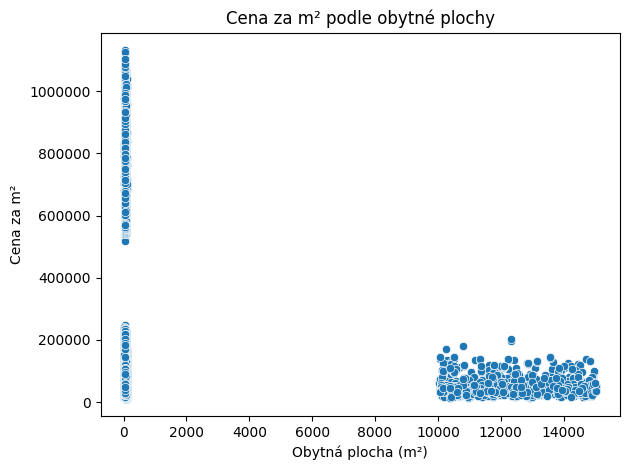

In [ ]:


plt.ticklabel_format(style='plain', axis='y')
sns.scatterplot(data=df, x="Obytná plocha", y="Cena za m/2")
plt.title("Cena za m² podle obytné plochy")
plt.xlabel("Obytná plocha (m²)")
plt.ylabel("Cena za m² v Kč")
plt.tight_layout()
plt.show()


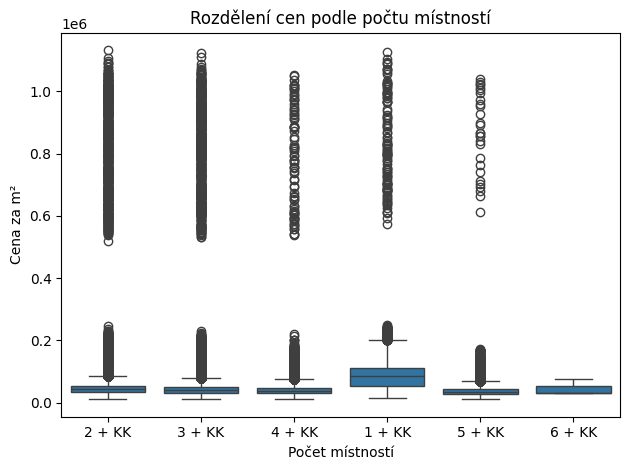

In [ ]:

sns.boxplot(data=df, x="Počet místností", y="Cena za m/2")
plt.title("Rozdělení cen podle počtu místností")
plt.xlabel("Počet místností")
plt.ylabel("Cena za m² v Kč")
plt.tight_layout()
plt.show()

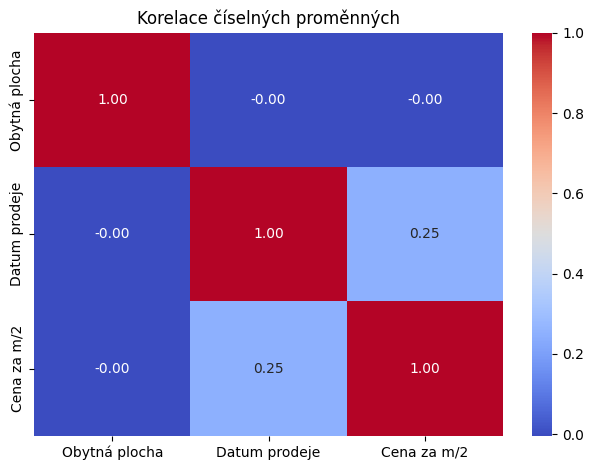

In [ ]:
# Correlation heatmap
numeric_df = df[["Obytná plocha", "Datum prodeje", "Cena za m/2"]].copy()

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelace numerických proměnných")
plt.tight_layout()
plt.show()

We can see that there is no correlation between the Obytná plocha and cena za m/2, but we have a weaker sign of relationship with the date of the sell and the price. This is showing that the prices are getting higher in time. This result needs to be treated carefully as the value is not high and it is not tested if it is significant (but with such number of rows, it will probably be significant)

3.	Data Preprocessing:
o	Handle missing values (imputation or removal).
o	Correct damaged values (where possible)
o	Encode categorical variables using techniques like one-hot encoding.
o	Normalize or standardize numerical features if necessary.



In [ ]:
# Handling missing values - I prefer removal as only a small percentage of rows will be removed
missing_percent = df.isnull().mean() * 100
print(missing_percent[missing_percent > 0])


original_len = len(df)
df = df.dropna(subset=['Obytná plocha', 'Počet místností', 'Podlaží', 'Datum prodeje'])
dropped_rows = original_len - len(df)
print(f"The total number of removed rows is: {dropped_rows} out of {original_len} which is ({(dropped_rows / original_len) * 100:.2f}%) percent")   

df['Podlaží'] = df['Podlaží'].astype(str)

# Onehot
categorical_cols = ['Lokalita', 'Počet místností', 'Podlaží']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Standardizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ['Obytná plocha', 'Datum prodeje']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])


Obytná plocha      0.195289
Počet místností    0.397128
Podlaží            0.987139
Datum prodeje      0.299082
dtype: float64
The total number of removed rows is: 28109 out of 1496243 which is (1.88%) percent


4.	Model Selection:
o	Split the dataset into training and testing sets using train_test_split from sklearn.
o	Choose a few different algorithms to compare (e.g., Linear Regression, Decision Trees, Random Forest).


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Features and target
X = df_encoded.drop(columns=['Cena za m/2'])
y = df_encoded['Cena za m/2']

# traintest split
X = X.drop(columns=['Místo/čas'], errors='ignore')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models for testing - I am adding SGD and GB as well to the suggestions
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SGD Regressor': SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

5.	Model Training:
o	Train the models using the training dataset.
o	Use sklearn for model training and evaluation.


6.	Model Evaluation:
o	Evaluate the models using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score.
o	Compare the performance of different models.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Now I need to train and evaluate all the models - this can take a while
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    }



# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                            MAE           MSE            R2
Linear Regression  7.385605e+03  6.953509e+08  4.333689e-01
Decision Tree      6.451635e+03  7.173535e+08  4.154393e-01
Random Forest      6.401782e+03  6.409346e+08  4.777119e-01
SGD Regressor      1.022226e+10  1.786988e+20 -1.456190e+11
Gradient Boosting  7.015717e+03  6.867959e+08  4.403402e-01


7.	Hyperparameter Tuning:
o	Use techniques like Grid Search or Random Search to optimize model parameters

From the results above, we see that **Random Forrest** is performing the best based of the statistics above. For training I will use GridSearch, however my computer crashed during the computation, so I will not run the cell below and just show, how it can be done - Solutions for that could be shrinking the data, connecting to more powerful PC.


8.	Final Model Selection:
o	Select the best-performing model based on evaluation metrics.


In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

The function above will give me the right parameters for setting up the **Random Forrest** algorithm, which would guide me how to find even more accurate results. But as mentioned before, my PC was not table to handle such testing on this big amount of data.